In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors
from matplotlib.colors import ListedColormap
import seaborn as sns

from pylab import rc
rc('text',usetex=True)

# %matplotlib inline
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('png')

#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")

In [1]:
colors = cm.viridis(np.linspace(0, 1, 10))

for i, color in enumerate(colors):
    plt.plot([0, 1], [i, i], color=color)

plt.show()

NameError: name 'cm' is not defined

In [38]:
with open("LRPDOSmu2Histogram.dat", "r") as f:
    hist_data = f.read()
    hist_data = np.array(list(map(float, hist_data.split('\n'))))    

In [39]:
with open("LRPDOSmu2Plot.dat", "r") as f:
    plot_data = f.read()
    plot_data = np.array(list(map(lambda x: x.split('\t'), plot_data.split('\n')))).astype(float)

c:\Users\shrok2.0\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Users\shrok2.0\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


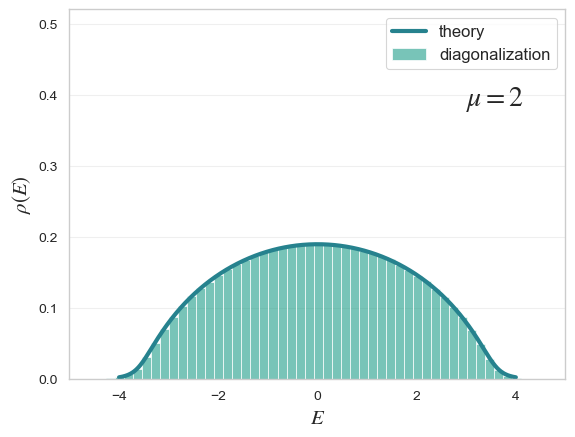

In [41]:
fig, ax = plt.subplots()

limits = [-5, 5]

bins = np.histogram_bin_edges(hist_data, bins=50, weights=None)
bins_in_range = bins[(bins < limits[1]+1) & (bins > limits[0]-1)]

sns.histplot(
    hist_data, 
    ax=ax, 
    bins=[hist_data.min()] + bins_in_range.tolist() + [hist_data.max()],
    stat="density",
    color=colors[5],
    label="diagonalization",
    alpha=0.6,
    linewidth=0.5,
)

ax.plot(plot_data[:, 0], plot_data[:, 1], alpha=1, color=colors[4], linewidth=3, label='theory')
ax.set_xlim(limits[0], limits[1])
ax.set_ylim(0, 0.52)

ax.set_xlabel('$E$', fontsize=15)
ax.set_ylabel(r"$\rho(E)$", fontsize=15)
ax.legend(fontsize=12, loc="upper right")


ax.text(
    0.8, 
    0.74, 
    r"$\mu = 2$", 
    transform=ax.transAxes,
    fontsize=20,
)

ax.grid(False)
ax.grid(True, which="both", axis='y', alpha=0.3)

ax.tick_params(axis='both', which='major', labelsize=10)

fig.savefig("LRPDoSgamma1mu20W1.pdf")
plt.show()
